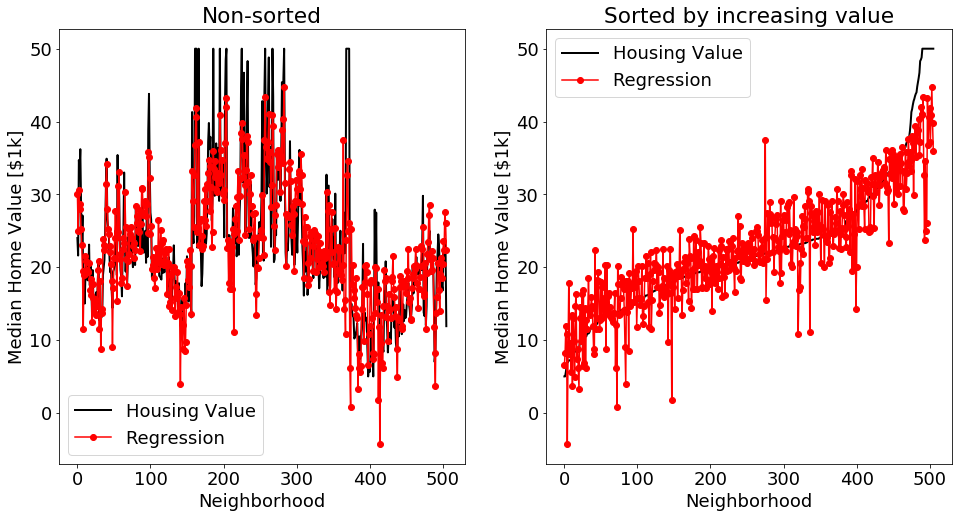

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
H = np.loadtxt('/Users/samue/Desktop/Dr Steven, University of Washington SVD Lectures/DATA/housing.data')
# 13 col/factors of housing/features & around 500+ rows of houses, then for b we have rows that represent the price of each house
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # features

# Pad with ones for nonzero offset, tagging a col of leading 1s
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.title('Non-sorted')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.title('Sorted by increasing value')
plt.ylabel('Median Home Value [$1k]')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

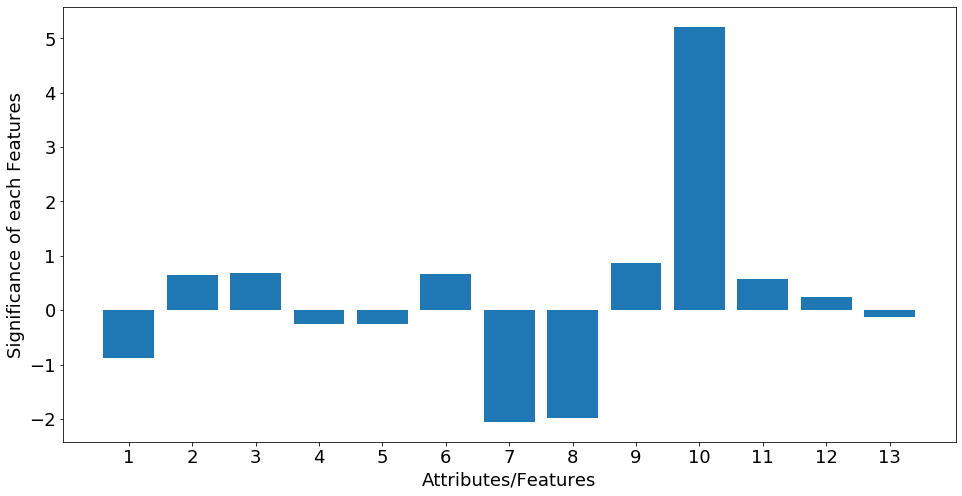

In [4]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attributes/Features')
plt.ylabel('Significance of each Features')
plt.xticks(x_tick)
plt.show()


Again the case of overfitting, since we used all the data. So what if we split the data into training and validation


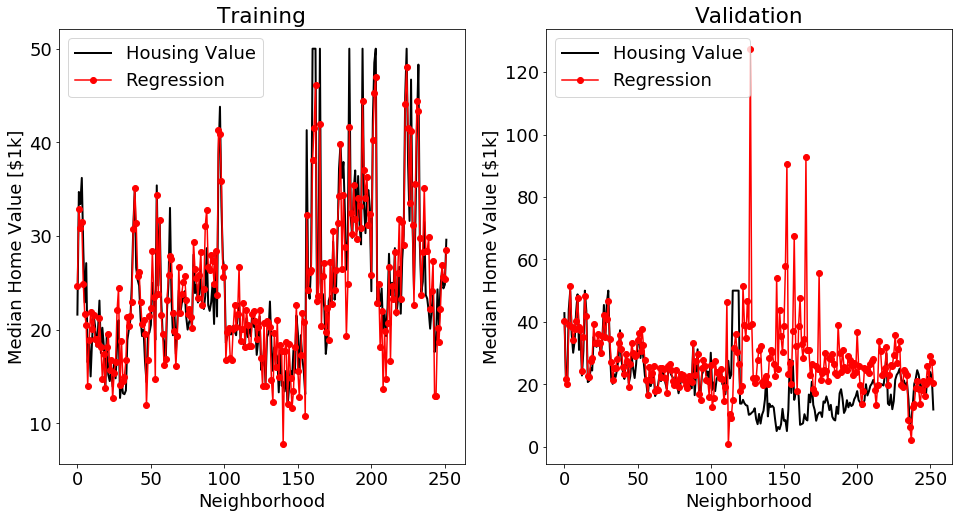

In [5]:
# Load dataset
H = np.loadtxt('/Users/samue/Desktop/Dr Steven, University of Washington SVD Lectures/DATA/housing.data')
# 13 col/factors of housing/features & around 500+ rows of houses, then for b we have rows that represent the price of each house
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # features

# Pad with ones for nonzero offset, tagging a col of leading 1s
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

n = 253
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]


# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(Atrain,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(btrain, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atrain@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.title('Training')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(btest, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atest@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.title('Validation')
plt.ylabel('Median Home Value [$1k]')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

We can clearly see that for the validation set, the regression does not actually follow the trend of the actual price at some intervals. This could be due to how the data was collected, neighbourhood by neighbourhood. Hence for our data sets we need to shuffle them.

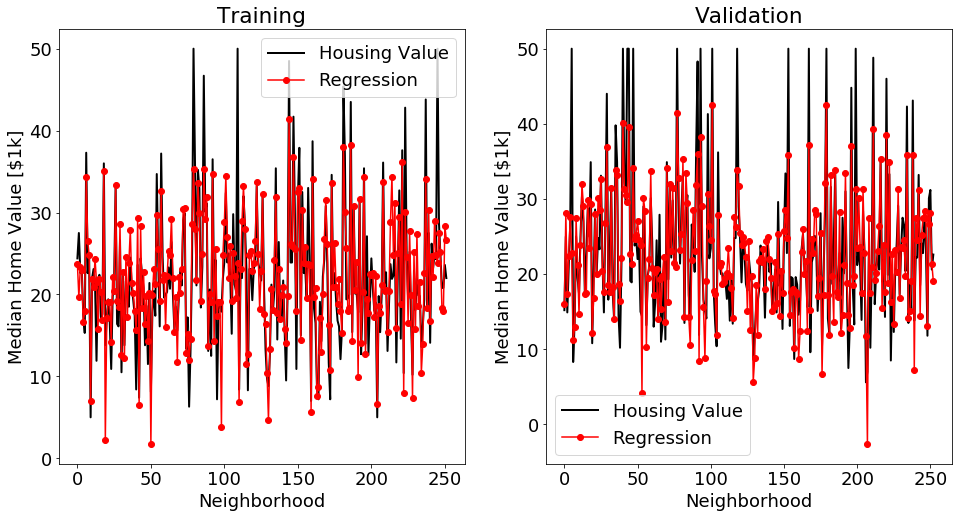

In [6]:
# Load dataset
H = np.loadtxt('/Users/samue/Desktop/Dr Steven, University of Washington SVD Lectures/DATA/housing.data')
# 13 col/factors of housing/features & around 500+ rows of houses, then for b we have rows that represent the price of each house
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # features

# Pad with ones for nonzero offset, tagging a col of leading 1s
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

n = 253
p = np.random.permutation(506) #vector p that get randomly get different indices from 1-506
A = A[p,:]
b = b[p]
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]


# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(Atrain,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(btrain, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atrain@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.title('Training')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(btest, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atest@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.title('Validation')
plt.ylabel('Median Home Value [$1k]')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

We can see the validation data is much better fit as we did proper sampling